In [2]:
#Data from previous files
largest_area = [222043.87939700004, 133495.572454, 102815.22874300001, 85122.58972850002]
concentration = [0.0, 6.0, 12.0, 24.0]

intensity_ratio = []
for i in largest_area:
    intensity_ratio.append(largest_area[0]/i)

print(intensity_ratio)

[1.0, 1.6633051966836734, 2.159639988274767, 2.608518844471401]


[0.0, 6.0, 12.0, 24.0]
[1.0, 1.6633051966836734, 2.159639988274767, 2.608518844471401]


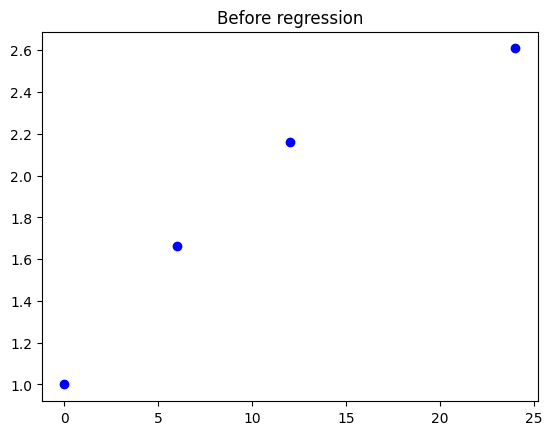

In [9]:
import matplotlib.pyplot as plt

#X and Y values for regression
x_val = concentration
y_val = intensity_ratio

print(x_val)
print(y_val)

plt.plot(x_val, y_val, 'bo')
plt.title("Before regression")
plt.show()

In [45]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.12.0


In [57]:
#TensorFlow graph
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
])

#Loss function and the optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [58]:
# Train the model
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['mse'])
for epoch in range(1001):
    loss, mse = model.train_on_batch(x_val, y_val)
    if epoch % 100 == 0:
        w, b = model.get_weights()
        print('Epoch %d: w = %f, b = %f, loss = %f' % (epoch, w[0][0], b[0], loss))

# Print the final weights and biases
w, b = model.get_weights()
print('w =', w[0][0])
print('b =', b[0])

# Compute R^2 value
y_mean = np.mean(y_val)
ss_tot = np.sum(np.square(y_val - y_mean))
y_pred = model.predict(x_val).flatten()
ss_res = np.sum(np.square(y_val - y_pred))
r2 = 1 - (ss_res / ss_tot)
print('R^2 value:', r2)

Epoch 0: w = -0.014667, b = -1.003249, loss = 10.455136
Epoch 100: w = 0.154523, b = -0.387424, loss = 1.051341
Epoch 200: w = 0.122769, b = 0.154481, loss = 0.463347
Epoch 300: w = 0.098975, b = 0.574557, loss = 0.176859
Epoch 400: w = 0.083108, b = 0.855025, loss = 0.067950
Epoch 500: w = 0.073751, b = 1.020484, loss = 0.034720
Epoch 600: w = 0.068835, b = 1.107423, loss = 0.026509
Epoch 700: w = 0.066521, b = 1.148343, loss = 0.024855
Epoch 800: w = 0.065541, b = 1.165669, loss = 0.024582
Epoch 900: w = 0.065167, b = 1.172288, loss = 0.024545
Epoch 1000: w = 0.065038, b = 1.174571, loss = 0.024541
w = 0.06503797
b = 1.174571
R^2 value: 0.9312732142444752


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Text(15, 1.75, 'y = 0.065*x + 1.175\n$R^{2}$ = 0.931')

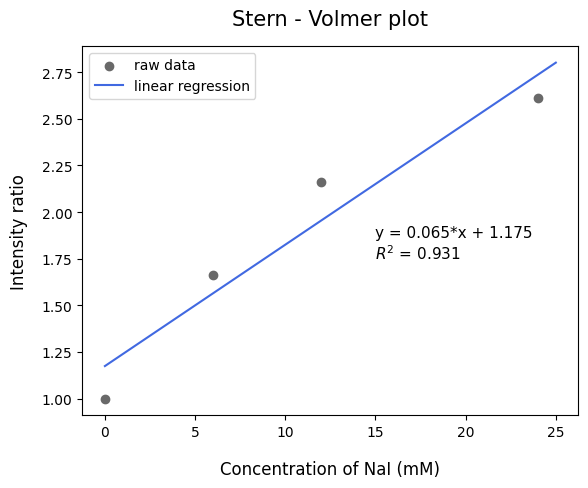

In [110]:
sample_x = np.linspace(0, 25, 1000)

plt.scatter(x_val, y_val, color = 'dimgray', label = 'raw data')
plt.plot(sample_x, sample_x * w[0][0] + b[0], color = 'royalblue', label = 'linear regression')

plt.title('Stern - Volmer plot', loc = 'center', pad = 15, fontsize = 15)
plt.legend(loc = 'best')

plt.xlabel("Concentration of NaI (mM)", labelpad = 15, fontsize = 12, color = 'black', loc='center')
plt.ylabel("Intensity ratio", labelpad = 10, fontsize = 12, color = 'black', loc='center')

plt.text(15, 1.75, f"y = {w[0][0]:.3f}*x + {b[0]:.3f}" + "\n" + r'$R^{2}$ = ' + f"{r2:.3f}", fontsize = 11)